In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, manifold

sr_points, sr_color = datasets.make_swiss_roll(n_samples=2500, random_state=0)

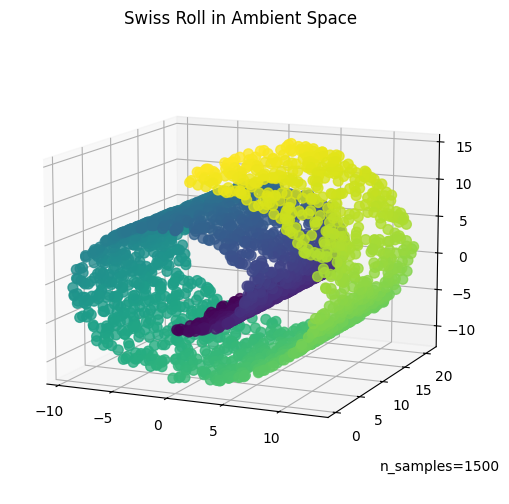

In [2]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

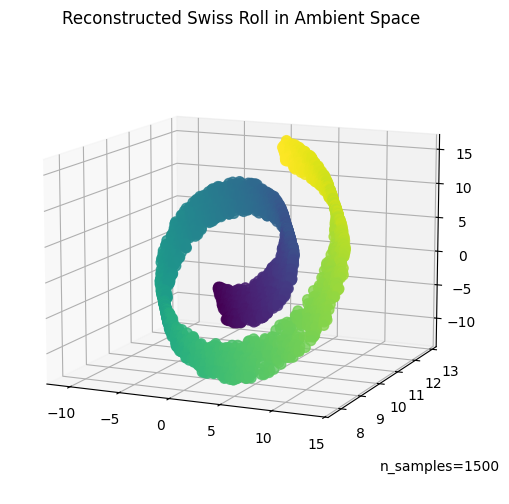

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_out = pca.fit_transform(sr_points)
reconstructed = pca.inverse_transform(pca_out)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Reconstructed Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

This reconstruction looks good, but only if you do not zoom in properly.

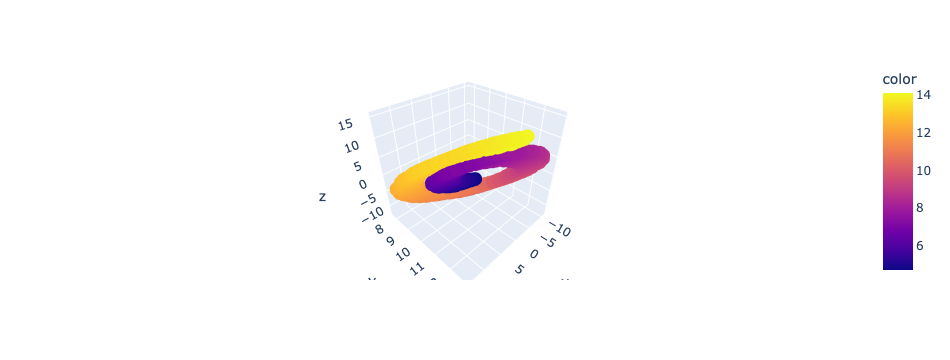

In [19]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(reconstructed, columns=['x', 'y', 'z']).assign(color=sr_color)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='color')
fig.show()

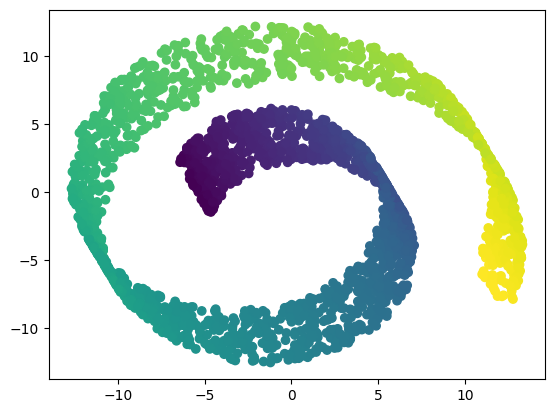

In [5]:
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=sr_color)

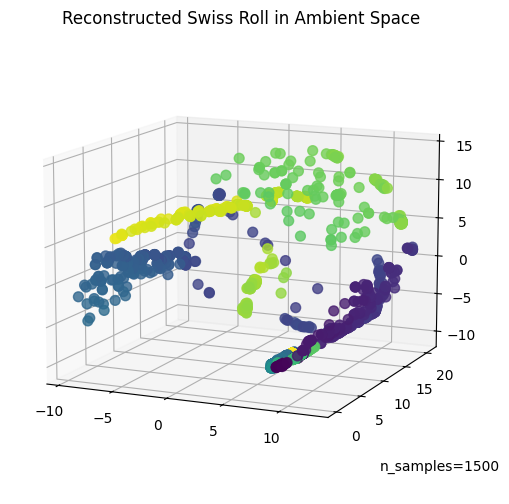

In [6]:
from umap import UMAP

umap = UMAP(n_components=2)
umap_out = umap.fit_transform(sr_points)
reconstructed = umap.inverse_transform(pca_out)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    reconstructed[:, 0], reconstructed[:, 1], reconstructed[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Reconstructed Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

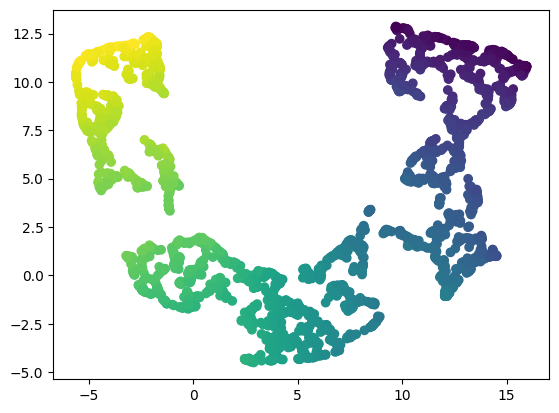

In [7]:
plt.scatter(umap_out[:, 0], umap_out[:, 1], c=sr_color)

In [8]:
df = pd.DataFrame(reconstructed, columns=['x', 'y', 'z']).assign(color=sr_color)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='color')
fig.show()

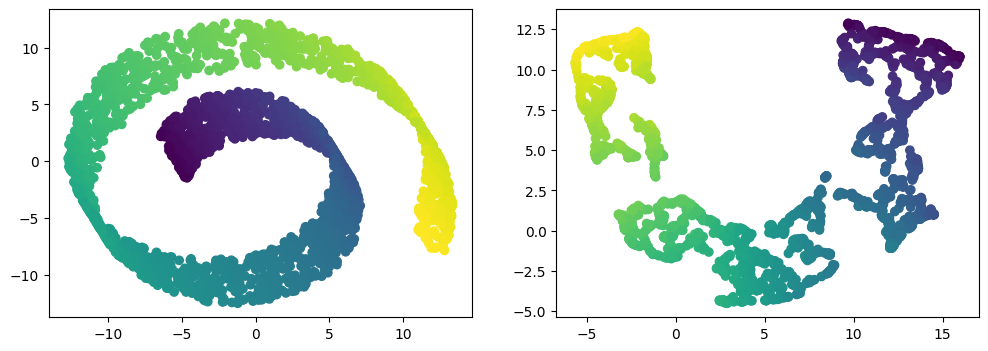

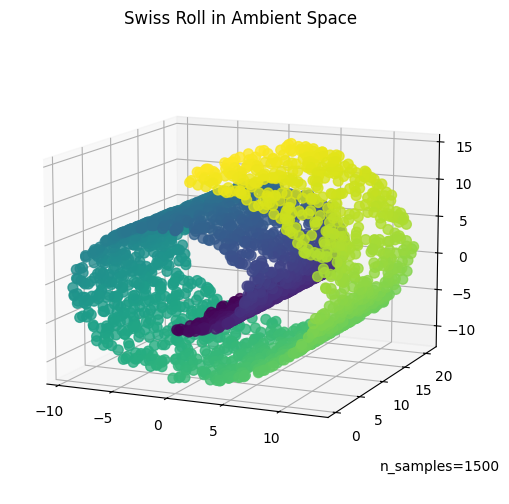

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=sr_color);

plt.subplot(122)
plt.scatter(umap_out[:, 0], umap_out[:, 1], c=sr_color);

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

Now with some more realistic data!

In [21]:
from bulk import BaseTextExplorer
import pandas as pd

df = pd.read_csv('support.csv')

In [11]:
from embetter.text import SentenceEncoder

In [12]:
enc = SentenceEncoder()
X = enc.transform(df['text'])

/Users/vincent/Development/calmcode.io/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



In [26]:
X[0] = X[0] * 5000

In [29]:
X_pca = PCA().fit_transform(X)
X_umap = UMAP().fit_transform(X)

In [30]:
df_pca = df.assign(x=X_pca[:, 0], y=X_pca[:, 1])

BaseTextExplorer(df_pca, X=X, encoder=enc)

In [31]:
df_umap = df.assign(x=X_umap[:, 0], y=X_umap[:, 1])

BaseTextExplorer(df_umap, X=X, encoder=enc)

In [16]:
from cluestar import plot_text_comparison

In [17]:
plot_text_comparison(X_pca, X_umap, texts=df['text'])

alt.HConcatChart(...)